# HW 2

In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import scipy.optimize as opt
import matplotlib.pyplot as plt

style = "https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle"
plt.style.use(style)

In [2]:
rng = np.random.RandomState(seed=193)

/Users/home/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


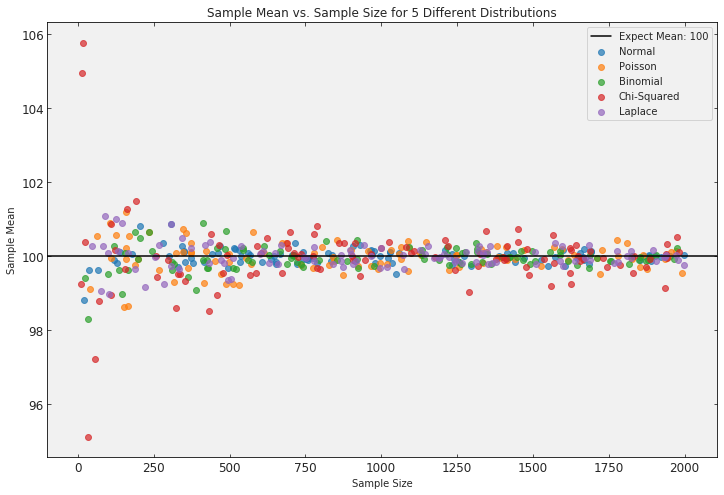

In [3]:
distributions = ["Normal", "Poisson", "Binomial", "Chi-Squared", "Laplace"]
mu = 100

sample_sizes = sp.stats.randint.rvs(low=10,high=2000,
                                    size=(5, 100), random_state=rng)
sample_means = np.zeros_like(sample_sizes, dtype=float)

fig, ax = plt.subplots(figsize=(12, 8))

for i, distr in enumerate(distributions):
    
    if distr == "Normal":
        for j, sample_size in enumerate(sample_sizes[i]):
            sample = sp.stats.norm.rvs(loc=mu, scale=5,
                                       size=sample_size, random_state=rng)
            sample_means[i][j] = sample.mean()
            
    if distr == "Poisson":
        for j, sample_size in enumerate(sample_sizes[i]):
            sample = sp.stats.poisson.rvs(mu=mu,
                                          size=sample_size, random_state=rng)
            sample_means[i][j] = sample.mean()
            
    if distr == "Binomial":
        for j, sample_size in enumerate(sample_sizes[i]):
            sample = sp.stats.binom.rvs(n=int(mu/0.5), p=0.5,
                                        size=sample_size, random_state=rng)
            sample_means[i][j] = sample.mean()
            
    if distr == "Chi-Squared":
        for j, sample_size in enumerate(sample_sizes[i]):
            sample = sp.stats.chi2.rvs(df=mu,
                                       size=sample_size, random_state=rng)
            sample_means[i][j] = sample.mean()

    if distr == "Laplace":
        for j, sample_size in enumerate(sample_sizes[i]):
            sample = sp.stats.laplace.rvs(loc=mu, scale=5,
                                          size=sample_size, random_state=rng)
            sample_means[i][j] = sample.mean()

    ax.scatter(sample_sizes[i], sample_means[i], label=distr, alpha=0.7)
    
plt.axhline(y=mu, label=f"Expect Mean: {mu}", c="k")

plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Sample Mean vs. Sample Size for 5 Different Distributions")
    
plt.legend()
plt.show()

### Figure 1: This figure plots the mean of a sample of a distribution, plotted against the sample size. The true mean of all distributions was 100. We can see that the means of the samples with low sample sizes have a greater disparity from the true mean, while the samples with large sizes have a mean closer to the true mean. This follows from the law of large numbers which states that the mean of the sample will approach the mean of the distribution as the size of the sample gets large. Additionally, we can qualitatively see the effects of the central limit theorem when we sample the distribition many times, the distribution of means looks like a normal distribution with the same mean as the mean of the underlying distribution.

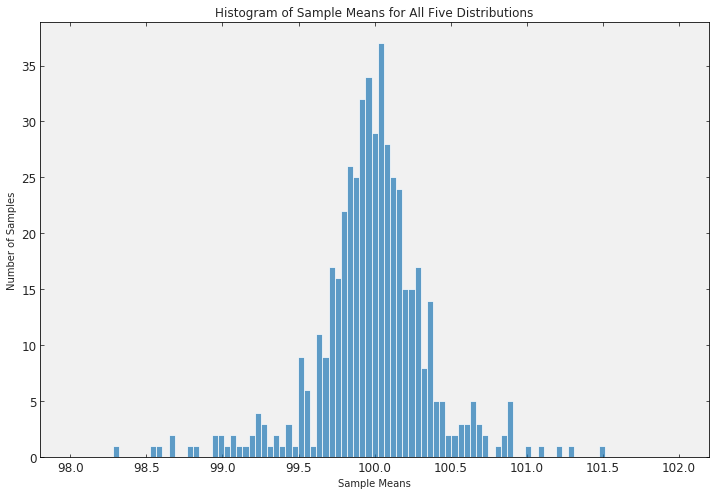

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(sample_means.flat,
        alpha=0.7,
        bins=np.linspace(98, 102, 100),
        label=distr)
plt.xlabel("Sample Means")
plt.ylabel("Number of Samples")
plt.title("Histogram of Sample Means for All Five Distributions")
plt.show()

### Figure 2: The distribution of sample means across all 500 samples from all five distributions. Qualitatively, the shape of this histogram looks like a normal distribution, further reinforcing the central limit theorem which says that the distribution of sample means taken from any distribution (will a well defined mean) will be normally distributed with a mean equal to the mean of the original distribution.

In [5]:
def Gaussian(x, mu, sigma, A):
    """
    Evaluates a Gaussian with mean mu and standard deviation sigma.

    Arguments
    ---------
    x : array-like
        The points to evaluate the Gaussian. For this work, these will be
        wavelength values.
    mu : float
        The mean of the Gaussian.
    sigma : float
       The standard deviation of the Gaussian.
    A : amplitude
       The amplitude of the Gaussian.

    Returns
    -------
    gauss : array-like
    """

    normalization = 1 / (np.sqrt(2 * np.pi) * sigma)
    gauss = np.exp((-1/2) * ((x - mu) / sigma)**2)
    gauss *= normalization
    return gauss * A


hist, bin_edges = np.histogram(sample_means.flat,
                               bins=np.linspace(98, 102, 100))
bin_size = np.mean(np.diff(bin_edges))
bin_edges += bin_size/2
bin_edges = bin_edges[:-1]

popt, pcov = opt.curve_fit(Gaussian, bin_edges, hist, p0=(100, 1, 1))

# Calculating the R-squared of the fit
RSS = np.sum((hist - Gaussian(bin_edges, *popt))**2)
TSS = np.sum(hist**2)
Rsquared = 1 - RSS/TSS

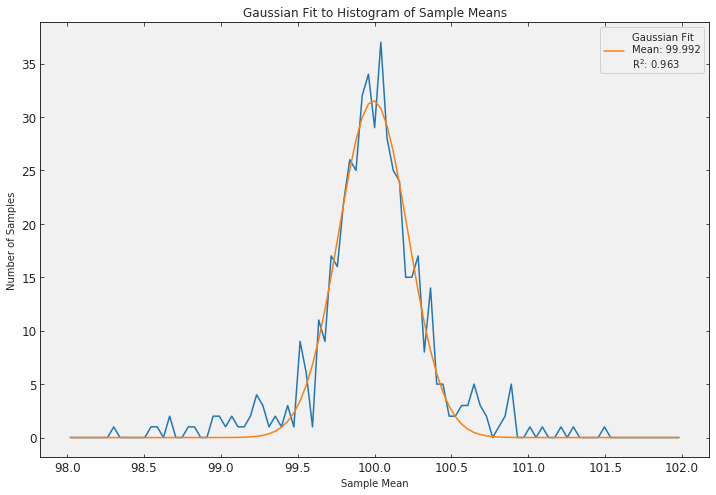

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(bin_edges, hist)
ax.plot(bin_edges, Gaussian(bin_edges, *popt), label=f"Gaussian Fit\nMean: {popt[0]:.3f}\nR$^2$: {Rsquared:.3f}")

plt.xlabel("Sample Mean")
plt.ylabel("Number of Samples")
plt.title("Gaussian Fit to Histogram of Sample Means")
plt.legend()
plt.show()

### Figure 3: A Gaussian is fit to the histogram of samples, showing a mean of 99.99 with an R$^2$ of 0.963. The central limit theorem says that the disitrbution of the sample means tends toward a normal distribution with a mean equal to the mean of the original disitrbution and this Gaussian fit provides evidence for that.

---

<h1 style="color:red"> Awesome !</h1>
